In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy.stats as st
from sklearn import ensemble, tree, linear_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
folder_path = 'fixed-time-dataset'
file_name = '11_oktomvri.csv'

drop_columns = ['noise_dba']

In [3]:
df = pd.read_csv(f'{folder_path}/{file_name}', parse_dates=['date_time'], index_col='date_time').drop(columns = drop_columns)

In [4]:
df.head()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,NaN,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444


In [5]:
df['temperature'] = df['temperature'].interpolate(method='linear')
df['humidity'] = df['humidity'].interpolate(method='linear')
df['visibility'] = df['visibility'].interpolate(method='linear')
df['noise'] = df['noise'].interpolate(method='linear')
df['pm25'] = df['pm25'].interpolate(method='linear')

In [6]:
df.dropna()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,48,17,99.0,14,57.761531,3.000000,1019.622560,-52.704789,0.0,982.522899,0.0,0.0,331.080483,10.000000,25.000000
2022-03-02 23:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,46,17,99.0,13,58.178665,3.000000,1019.584280,-53.676069,0.0,982.483911,0.0,0.0,329.667205,10.000000,25.000000
2022-03-02 23:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,45,17,99.0,13,58.549056,3.000000,1019.553725,-54.341168,0.0,982.452439,0.0,0.0,330.618992,10.000000,25.000000


In [7]:
df.isnull().sum()

sensor_id                0
lat                      0
log                      0
temperature              0
noise                    0
pm10                     0
humidity                 0
pm25                     0
relative_humidity        0
wind_speed               0
sea_level_pressure       0
solar_elevation_angle    0
solar_radiation          0
pressure                 0
snow                     0
uv                       0
wind_direction           0
visibility               0
clouds                   0
dtype: int64

In [8]:
pm10_mean = df['pm10'].mean()
pm10_std = df['pm10'].std()

df = df[(df['pm10'] > (pm10_mean - 3 * pm10_std)) & (df['pm10'] < (pm10_mean + 3 * pm10_std))] #outliers removal

In [9]:
def move_to_first_column(name, df):
    first_column = df.pop(name)
    df.insert(0, name, first_column)
    return df

def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0]]
        y.append(label)
    
    return np.array(X), np.array(y)

def plot_predictions(model, X, y, y_df_test, start = 0, end = 100):
    predictions = model.predict(X)
    p_preds = predictions[:, 0]
    p_actuals = y[:, 0]
    list_Year = [str(i).split(" ")[0][0:4] for i in list(y_df_test.index)]
    list_YM = [str(i).split(" ")[0][:-3] for i in  list(y_df_test.index)]
    df = pd.DataFrame(data = {'PM10 predictions': p_preds,
                                 'PM10 actuals': p_actuals,
                                'sensor_id': y_df_test['sensor_id'],
                              'log': y_df_test['log'],
                              'lat': y_df_test['lat']
                             })
    
    df['Year'] = list_Year
    df['YM'] = list_YM
    
    df_yearly = df.groupby(['sensor_id', 'lat', 'log', 'Year', 'YM']).mean()
    df_yearly = df_yearly[['PM10 predictions', 'PM10 actuals']].reset_index()
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(14,8)})

    ax = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 predictions', label = 'Predicted values')
    bx = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 actuals', label = 'Actual values')


    plt.legend(bbox_to_anchor=(1, 1))
    plt.ylabel('PM10 (µg/m3)')
    plt.xlabel('Year')
    plt.legend(loc="upper left")
    plt.show()

    return df

def preprocess_output(y, X):
    p_training_mean = np.mean(X[:, :, 0])
    p_training_std = np.std(X[:, :, 0])
    y[:, 0] = np.abs((y[:, 0] - p_training_mean) / p_training_std)
    return y

In [10]:
df = move_to_first_column('pm10', df)

In [11]:
y_df = df.iloc[4:, :]
df.drop(columns = ['sensor_id', 'lat', 'log'], inplace = True)

In [12]:
scaler = MinMaxScaler()
df[list(df.columns)[1:]] = scaler.fit_transform(df[list(df.columns)[1:]])
df.head()

,pm10,temperature,noise,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,85,0.469388,0.220238,0.516854,0.340909,0.818695,0.113164,0.498549,0.077042,0.0,0.812181,0.0,0.0,0.659931,0.309236,0.789439
2017-11-09 00:45:00,71,0.469388,0.273810,0.516854,0.290909,0.820693,0.113164,0.499968,0.090144,0.0,0.812629,0.0,0.0,0.661751,0.276736,0.833639
2017-11-09 01:00:00,43,0.469388,0.142857,0.516854,0.172727,0.824221,0.112648,0.501341,0.104740,0.0,0.813125,0.0,0.0,0.662742,0.255694,0.868178
2017-11-09 01:15:00,42,0.469388,0.142857,0.505618,0.163636,0.828266,0.109716,0.502677,0.120620,0.0,0.813655,0.0,0.0,0.663113,0.288090,0.857811
2017-11-09 01:30:00,42,0.469388,0.202381,0.505618,0.168182,0.831825,0.106783,0.503983,0.137579,0.0,0.814202,0.0,0.0,0.663069,0.320486,0.847444


In [13]:
X, y = df_to_X_y(df, window_size = 4) # 1 hour
X.shape, y.shape

((147129, 4, 16), (147129, 1))

In [14]:
X_train, y_train = X[:round(len(X)*0.7)], y[:round(len(y)*0.7)] #70%
X_val, y_val = X[round(len(X)*0.7):round(len(X)*0.9)], y[round(len(y)*0.7):round(len(y)*0.9)]
X_test, y_test = X[round(len(X)*0.9):], y[round(len(y)*0.9):]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((102990, 4, 16),
 (29426, 4, 16),
 (14713, 4, 16),
 (102990, 1),
 (29426, 1),
 (14713, 1))

In [ ]:
input_size = (4, 16)
output_size = 1

In [15]:
y_test_df = y_df.iloc[round(len(X) * 0.9):, :]

In [16]:
preprocess_output(y_train, X)
preprocess_output(y_val, X)
preprocess_output(y_test, X)

array([[0.31033536],
       [0.26570879],
       [0.37727522],
       ...,
       [0.37727522],
       [0.37727522],
       [0.31033536]])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21,265
Trainable params: 21,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 23s 6ms/step - loss: 0.2592 - root_mean_squared_error: 0.5091 - mean_absolute_percentage_error: 125.3279 - val_loss: 0.0745 - val_root_mean_squared_error: 0.2729 - val_mean_absolute_percentage_error: 92.5238
Epoch 2/10
3219/3219 [==============================

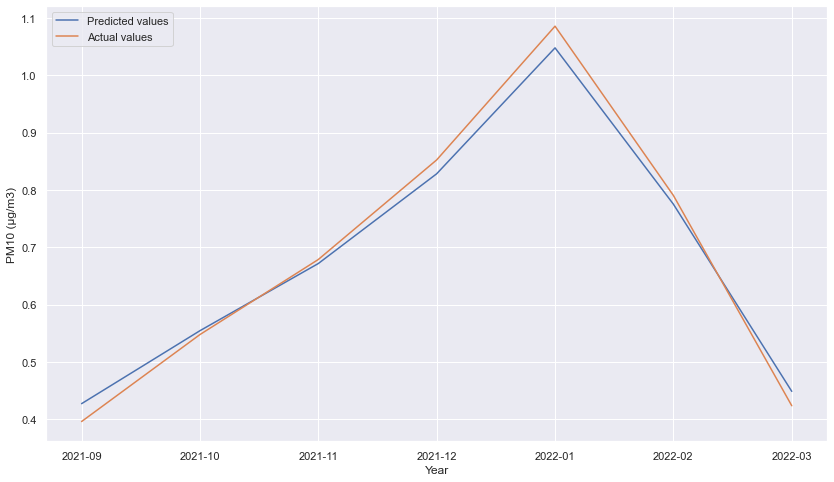

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.203962,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.289416,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.279194,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.371367,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.386424,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.420528,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.413205,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.406910,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [17]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21,265
Trainable params: 21,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 20s 5ms/step - loss: 0.1499 - root_mean_squared_error: 0.3871 - mean_absolute_percentage_error: 109.8384 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2875 - val_mean_absolute_percentage_error: 82.5722
Epoch 2/10
3219/3219 [============================

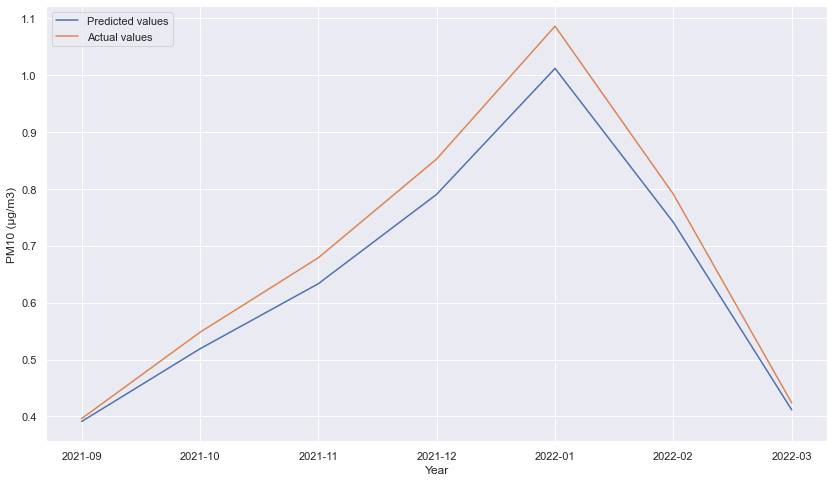

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.160420,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.253194,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.246675,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.331650,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.351894,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.385743,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.376469,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.370277,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [18]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21,265
Trainable params: 21,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 20s 5ms/step - loss: 0.1607 - root_mean_squared_error: 0.4009 - mean_absolute_percentage_error: 120.0685 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2925 - val_mean_absolute_percentage_error: 102.7479
Epoch 2/10
3219/3219 [===========================

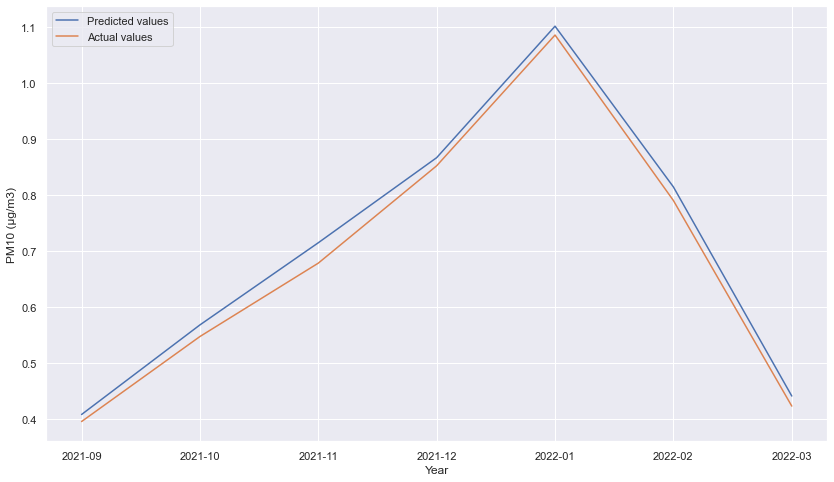

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.196575,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.281191,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.276016,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.362280,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.374938,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.400466,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.393908,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.387453,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [19]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21,265
Trainable params: 21,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 20s 5ms/step - loss: 0.1171 - root_mean_squared_error: 0.3422 - mean_absolute_percentage_error: 112.0720 - val_loss: 0.0718 - val_root_mean_squared_error: 0.2679 - val_mean_absolute_percentage_error: 103.0586
Epoch 2/10
3219/3219 [===========================

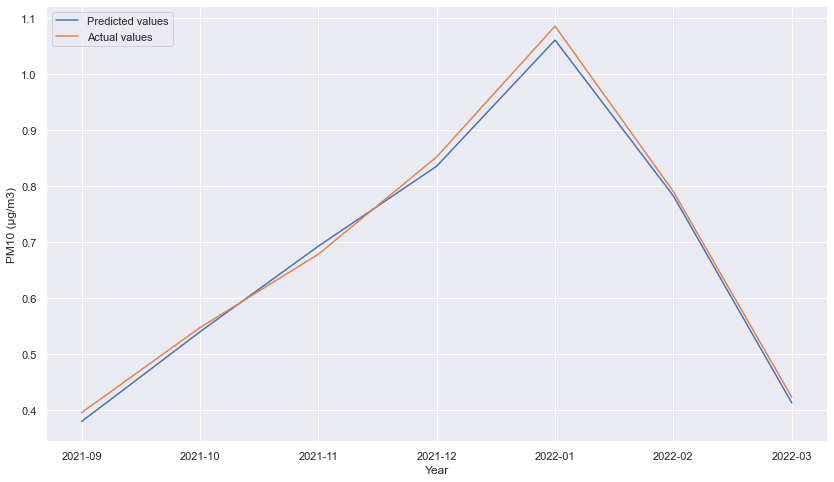

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.187171,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.258741,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.246314,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.328517,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.342731,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.369397,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.362894,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.357807,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [20]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 34)             6936      
                                                                 
 lstm_5 (LSTM)               (None, 64)                25344     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 31s 8ms/step - loss: 0.1143 - root_mean_squared_error: 0.3381 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2751
Epoch 2

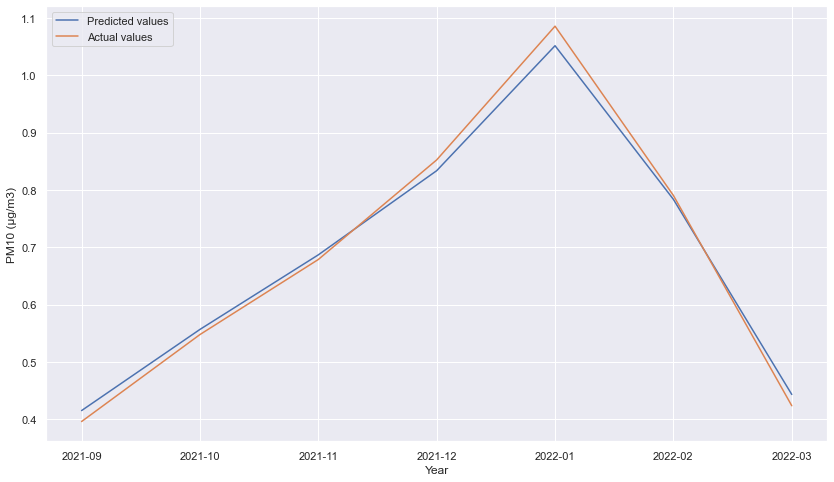

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.228180,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.283760,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.278292,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.355370,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.373595,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.406213,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.398528,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.392120,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [21]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 34)             6936      
                                                                 
 lstm_7 (LSTM)               (None, 64)                25344     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 31s 8ms/step - loss: 0.1342 - root_mean_squared_error: 0.3663 - val_loss: 0.0830 - val_root_mean_squared_error: 0.2881
Epoch 2

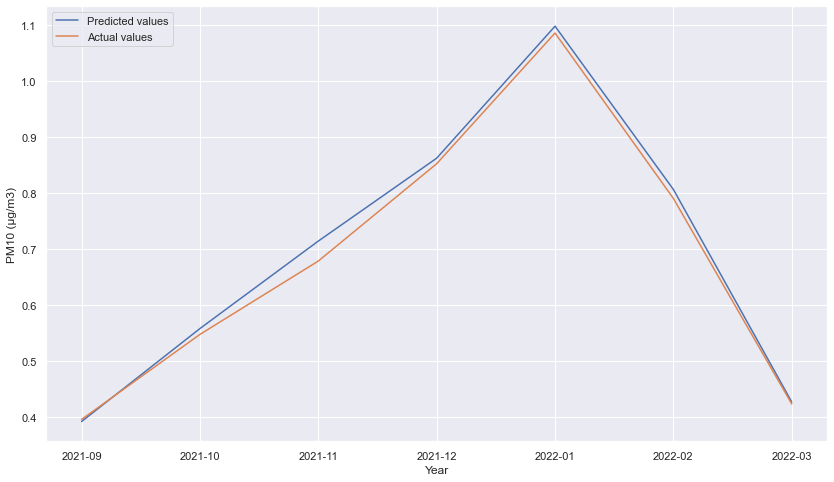

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.198091,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.260347,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.258671,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.340880,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.353635,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.384015,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.379965,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.372257,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [22]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4, 34)             6936      
                                                                 
 lstm_9 (LSTM)               (None, 64)                25344     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 32s 9ms/step - loss: 0.5274 - root_mean_squared_error: 0.7262 - val_loss: 0.2884 - val_root_mean_squared_error: 0.5370
Epoch 2

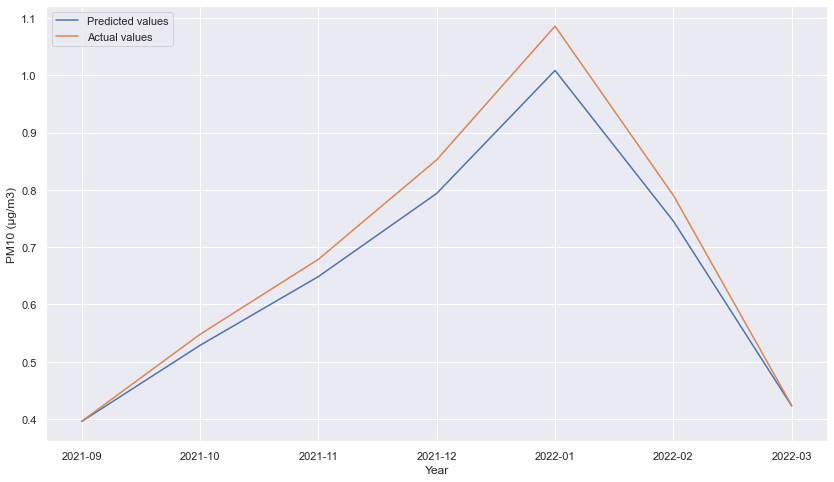

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.183209,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.253632,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.244753,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.340426,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.356364,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.393160,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.389297,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.382471,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [23]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4, 34)             6936      
                                                                 
 lstm_11 (LSTM)              (None, 64)                25344     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 31s 8ms/step - loss: 0.1146 - root_mean_squared_error: 0.3386 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2748
Epoch 2

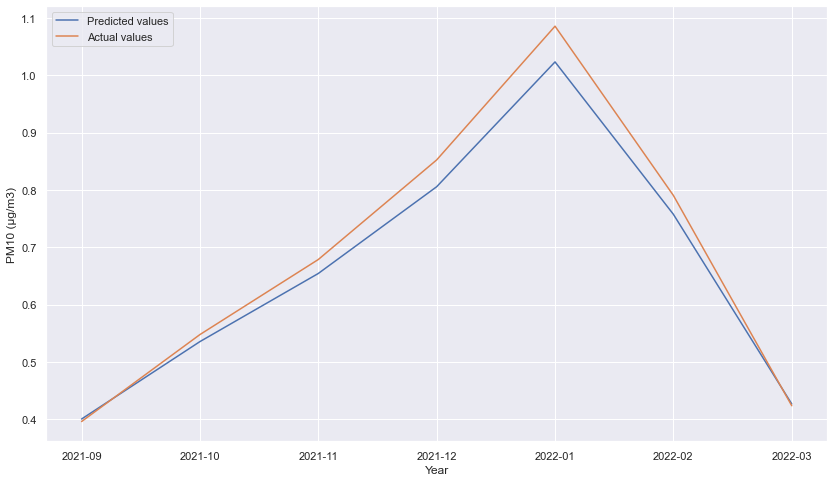

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.178754,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.252401,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.241983,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.335253,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.356587,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.393108,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.385855,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.380055,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [24]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                15744     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,273
Trainable params: 16,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 24s 6ms/step - loss: 0.1161 - root_mean_squared_error: 0.3407 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2652
Epoch 2/10
3219/3219 [==============================] - 19s 6ms/step - loss: 0.0705 - root_mean_squared_error: 0.2655 - val_loss: 0.0713 - 

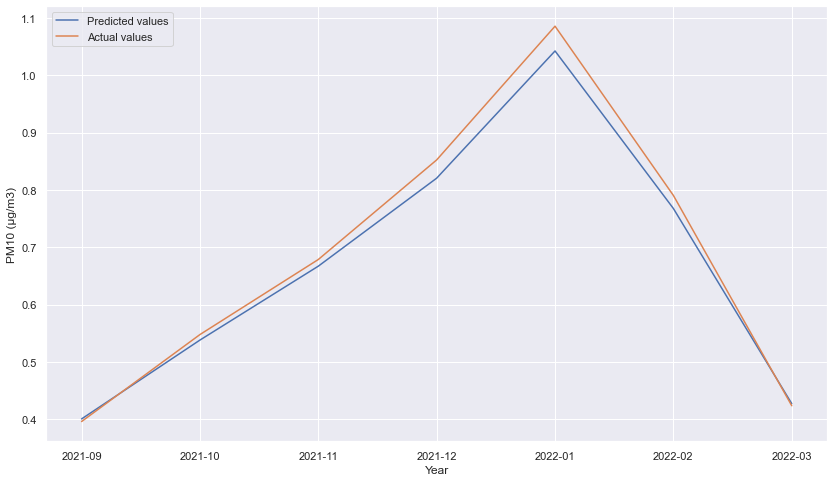

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.182701,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.273018,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.261800,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.343199,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.365213,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.390978,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.379672,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.375312,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [25]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                15744     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,273
Trainable params: 16,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 21s 6ms/step - loss: 0.1526 - root_mean_squared_error: 0.3906 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2904
Epoch 2/10
3219/3219 [==============================] - 17s 5ms/step - loss: 0.0759 - root_mean_squared_error: 0.2755 - val_loss: 0.0714 - 

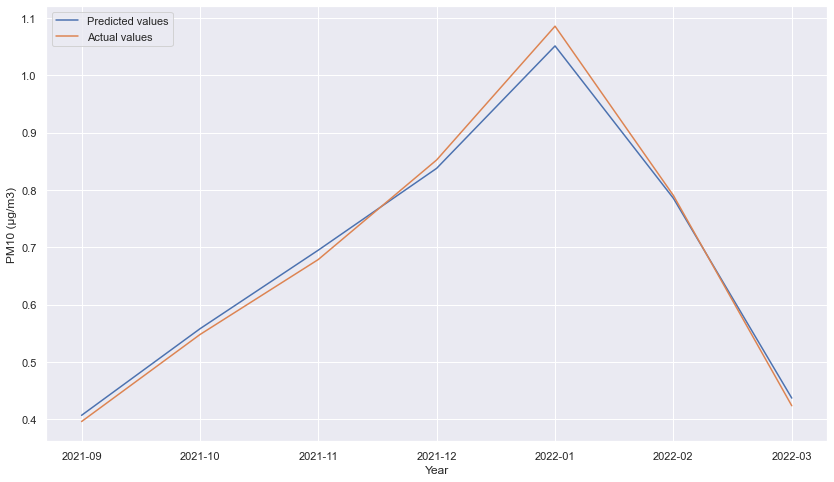

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.205205,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.277577,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.274291,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.344488,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.360913,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.391993,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.381231,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.373459,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [26]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                15744     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,273
Trainable params: 16,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 20s 6ms/step - loss: 0.1487 - root_mean_squared_error: 0.3856 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2876
Epoch 2/10
3219/3219 [==============================] - 18s 6ms/step - loss: 0.0766 - root_mean_squared_error: 0.2768 - val_loss: 0.0713 -

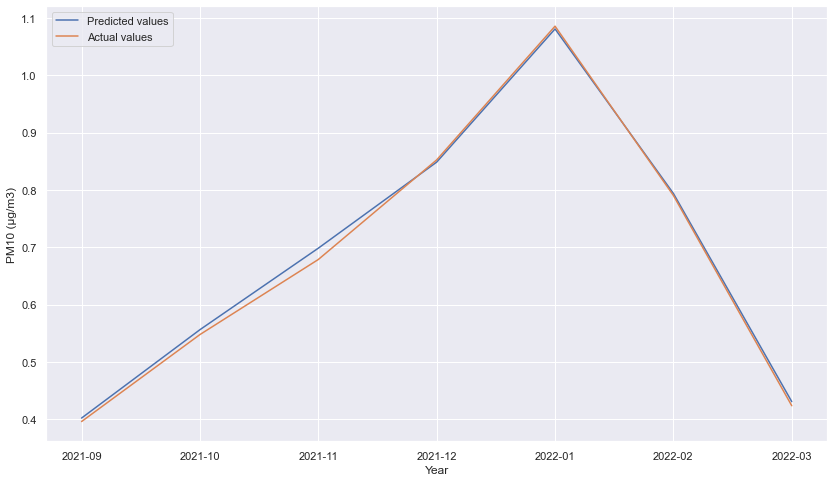

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.199699,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.283084,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.272898,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.346813,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.360805,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.388915,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.381163,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.377468,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [27]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                15744     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,273
Trainable params: 16,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 20s 5ms/step - loss: 0.0982 - root_mean_squared_error: 0.3134 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2702
Epoch 2/10
3219/3219 [==============================] - 17s 5ms/step - loss: 0.0709 - root_mean_squared_error: 0.2662 - val_loss: 0.0691 -

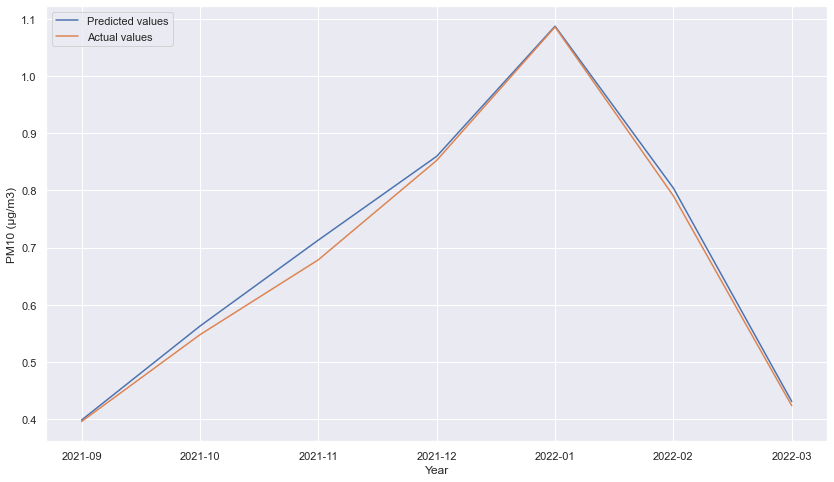

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.214048,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.281122,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.262894,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.339947,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.360234,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.387232,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.379836,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.374239,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [28]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             2112      
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_24 (Dense)            (None, 8)                 1544      
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,665
Trainable params: 3,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 9s 3ms/step - loss: 0.1231 - root_mean_squared_error: 0.3509 - val_loss: 0.0818 - val_root_mean_squared_error: 0.2859
Epoch 2/1

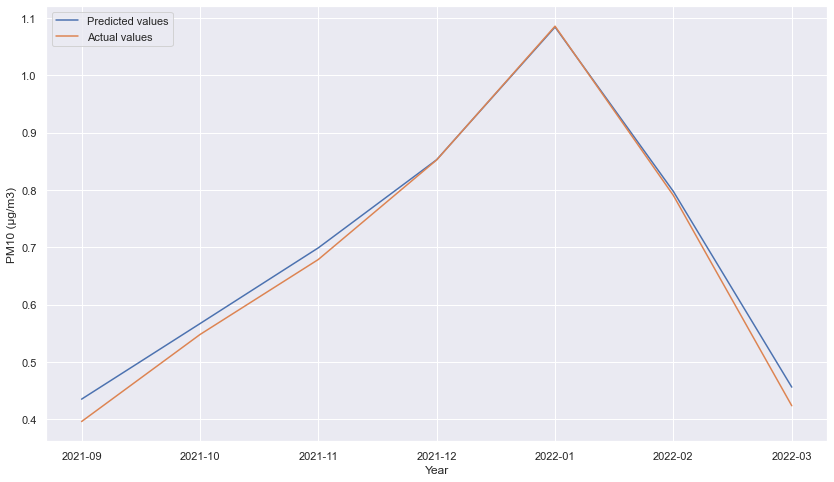

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.233014,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.285976,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.299896,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.376693,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.391466,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.429790,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.422672,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.415938,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [29]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_26 (Dense)            (None, 8)                 1544      
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,665
Trainable params: 3,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 8s 2ms/step - loss: 0.2753 - root_mean_squared_error: 0.5247 - val_loss: 0.1283 - val_root_mean_squared_error: 0.3582
Epoch 2/1

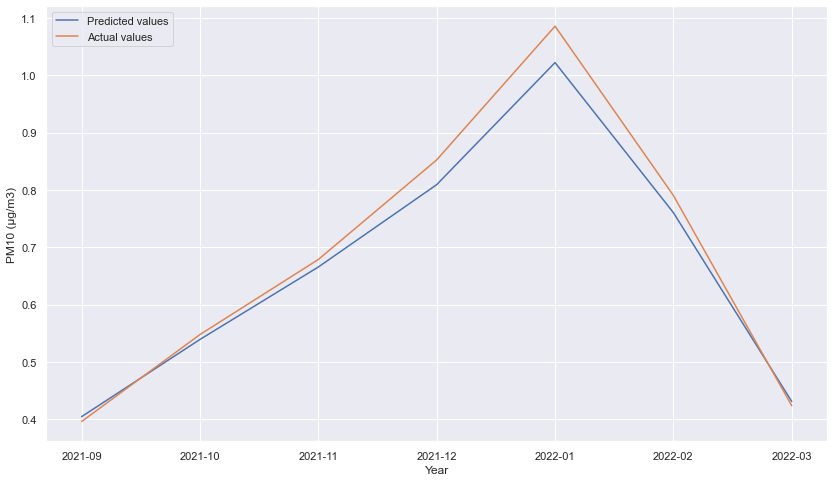

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.240402,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.230420,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.249042,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.313601,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.331866,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.408525,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.399732,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.377262,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [30]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_28 (Dense)            (None, 8)                 1544      
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,665
Trainable params: 3,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 9s 3ms/step - loss: 0.2335 - root_mean_squared_error: 0.4832 - val_loss: 0.1570 - val_root_mean_squared_error: 0.3963
Epoch 2/1

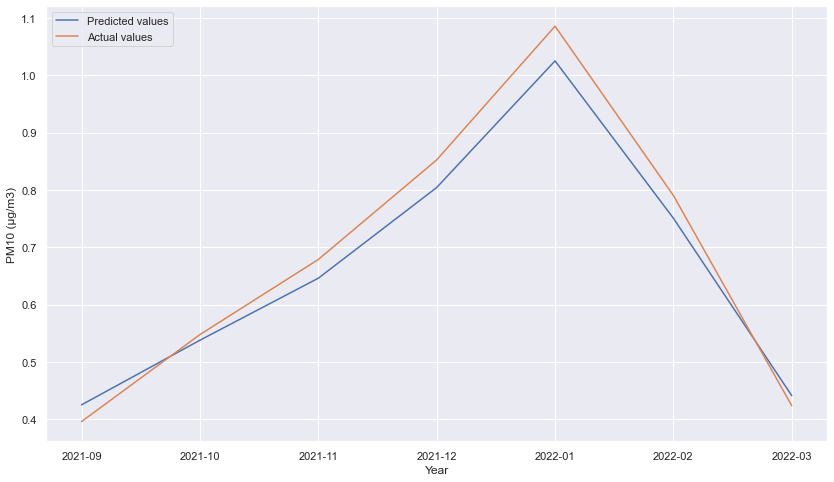

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.219935,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.296319,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.290774,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.374705,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.388498,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.422973,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.415863,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.412299,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [31]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 flatten_3 (Flatten)         (None, 192)               0         
                                                                 
 dense_30 (Dense)            (None, 8)                 1544      
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,665
Trainable params: 3,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [==============================] - 9s 3ms/step - loss: 0.2464 - root_mean_squared_error: 0.4964 - val_loss: 0.0791 - val_root_mean_squared_error: 0.2813
Epoch 2/1

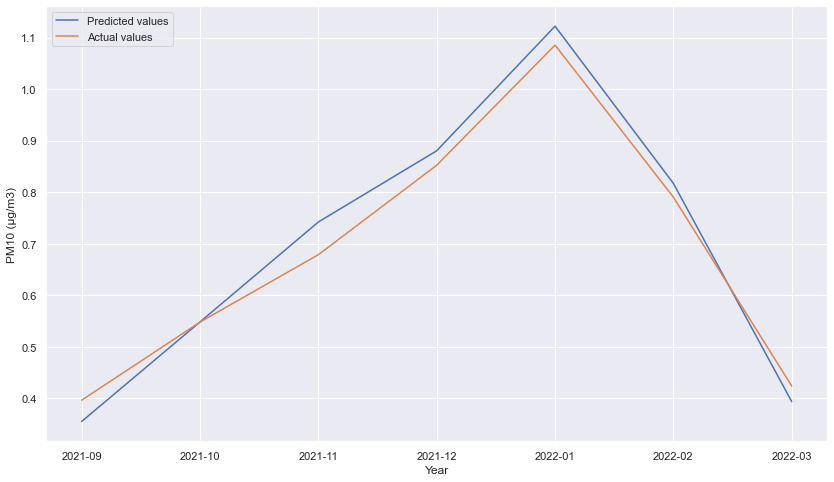

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.197670,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.189373,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.235876,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.269034,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.278314,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.324524,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.315164,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.301155,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [32]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 4, 64)             20736     
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 8)                 264       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33,425
Trainable params: 33,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [===========================

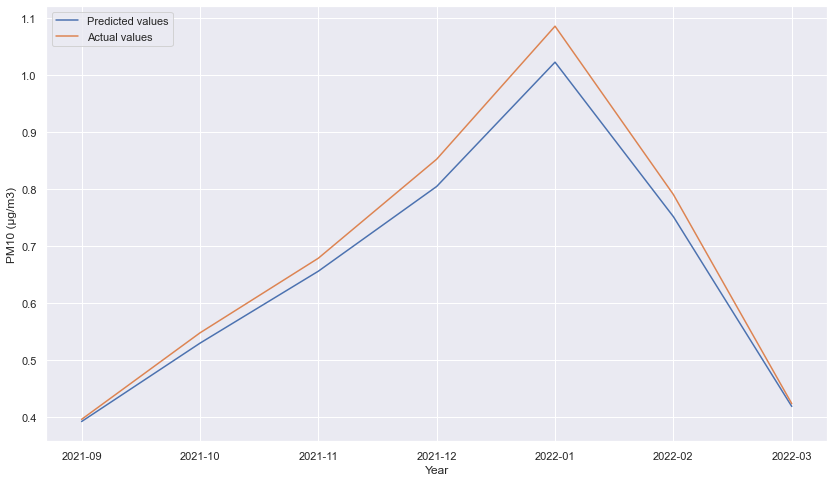

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.162413,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.276605,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.268134,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.347709,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.352702,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.384440,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.365069,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.367367,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [33]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 4, 64)             20736     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_34 (Dense)            (None, 8)                 264       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33,425
Trainable params: 33,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [===========================

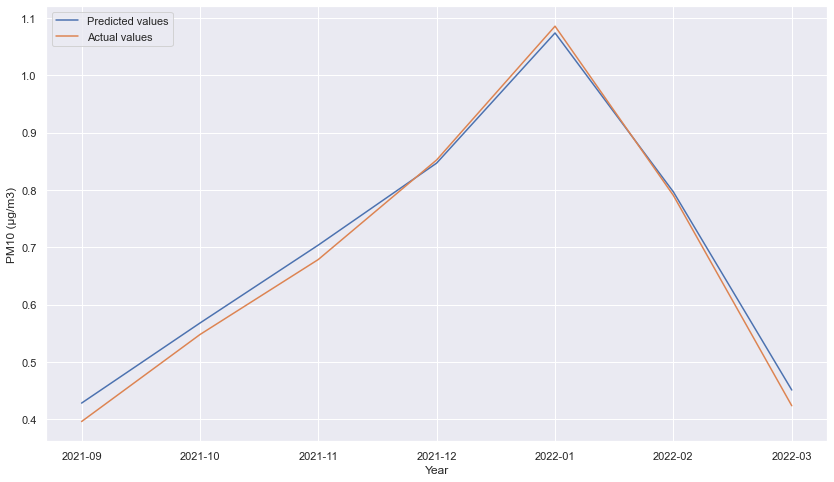

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.221723,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.329633,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.317526,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.378408,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.390915,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.427644,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.410599,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.407593,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [34]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 4, 64)             20736     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_36 (Dense)            (None, 8)                 264       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33,425
Trainable params: 33,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [===========================

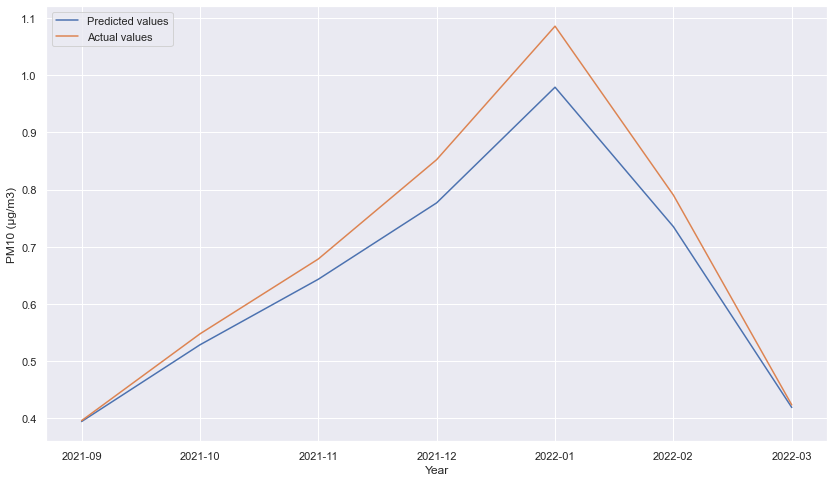

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.196421,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.279072,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.277619,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.354320,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.353565,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.384817,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.380359,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.373681,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [35]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 4, 64)             20736     
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_38 (Dense)            (None, 8)                 264       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33,425
Trainable params: 33,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3219/3219 [===========================

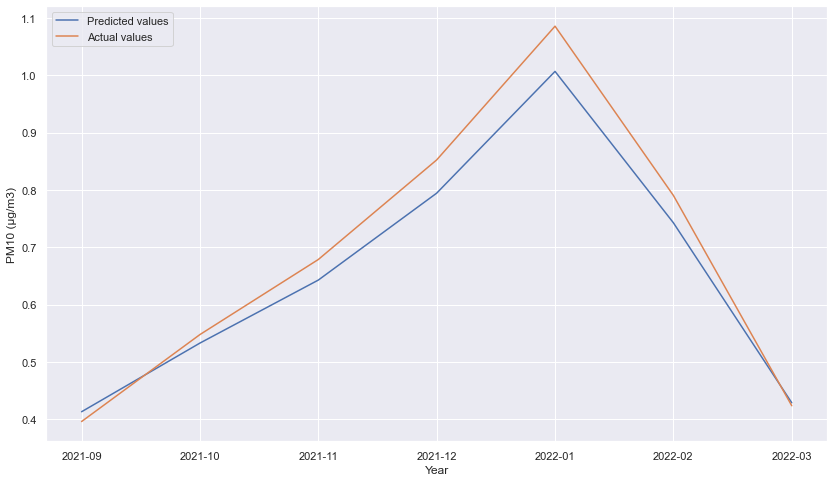

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.219491,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.301067,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.307359,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.380811,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.382099,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.403533,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.398178,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.397091,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [36]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4, 128)            18560     
                                                                 
 lstm_20 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dropout_4 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_40 (Dense)            (None, 8)                 264       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,657
Trainable params: 80,657
Non-tra

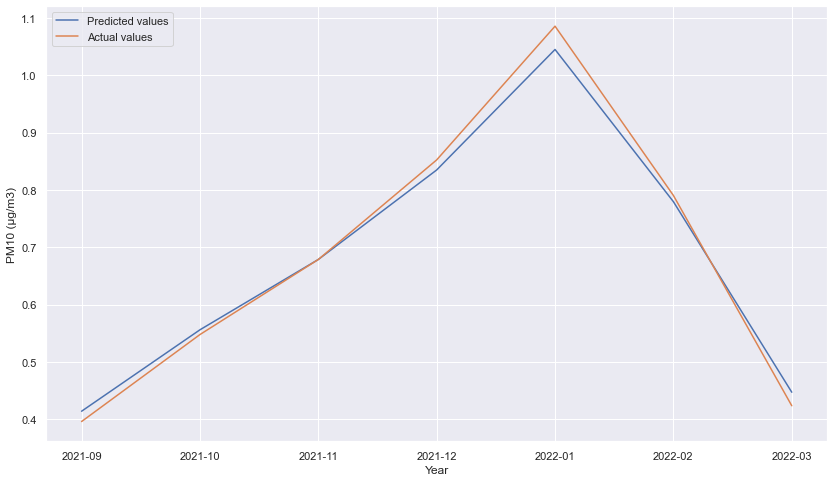

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.184420,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.319540,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.297629,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.360545,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.381534,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.407677,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.406738,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.398819,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [37]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4, 128)            18560     
                                                                 
 lstm_22 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dropout_5 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_42 (Dense)            (None, 8)                 264       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,657
Trainable params: 80,657
Non-tra

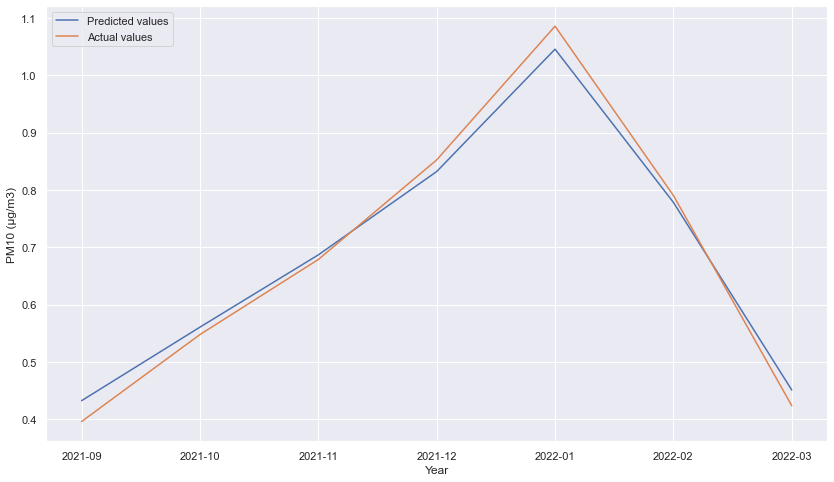

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.254042,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.320593,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.318737,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.388514,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.396272,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.424070,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.413270,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.415912,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [38]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 4, 128)            18560     
                                                                 
 lstm_24 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dropout_6 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_44 (Dense)            (None, 8)                 264       
                                                                 
 dense_45 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,657
Trainable params: 80,657
Non-tra

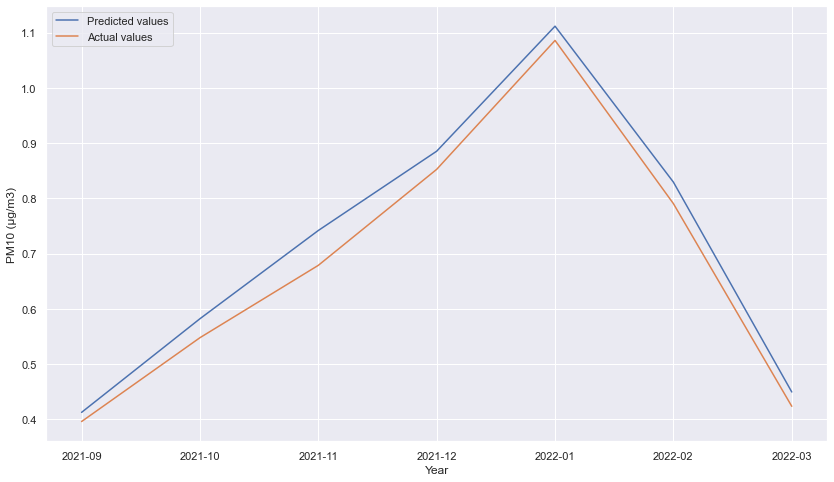

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.236618,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.302840,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.299828,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.379934,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.375859,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.383922,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.383607,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.387769,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [39]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 4, 128)            18560     
                                                                 
 lstm_26 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dropout_7 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_46 (Dense)            (None, 8)                 264       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,657
Trainable params: 80,657
Non-tra

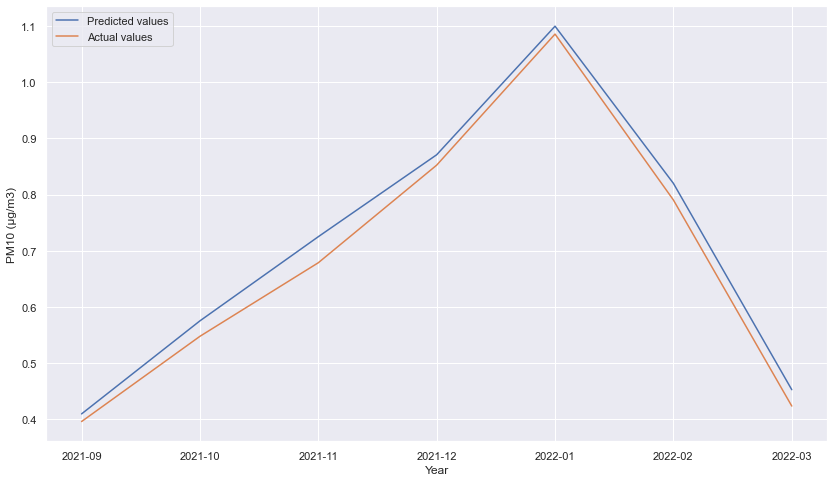

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.197040,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.284576,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.283842,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.348773,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.371143,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.402602,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.390811,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.397234,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [40]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 8)                 520       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
___________________________________________________

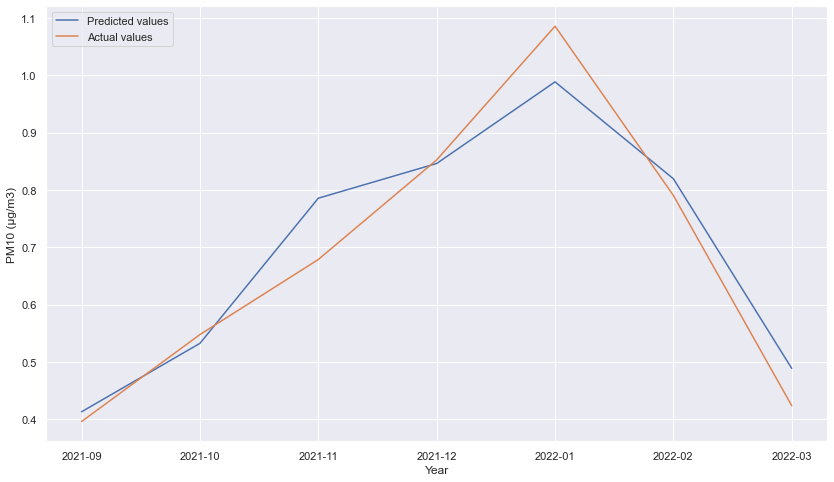

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.620210,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.601832,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.494136,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.550883,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.532825,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.475831,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.476586,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.506150,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [41]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 8)                 520       
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
___________________________________________________

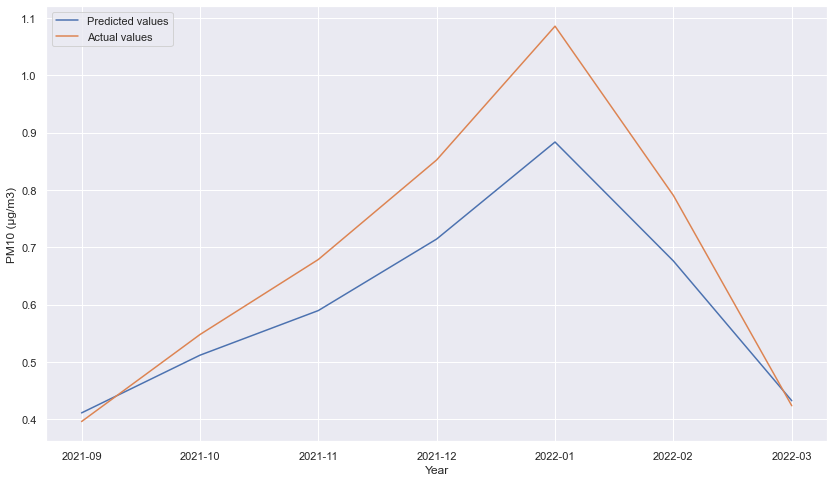

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.250167,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.241822,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.281049,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.287660,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.339291,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.417138,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.426586,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.367640,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [42]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 8)                 520       
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
___________________________________________________

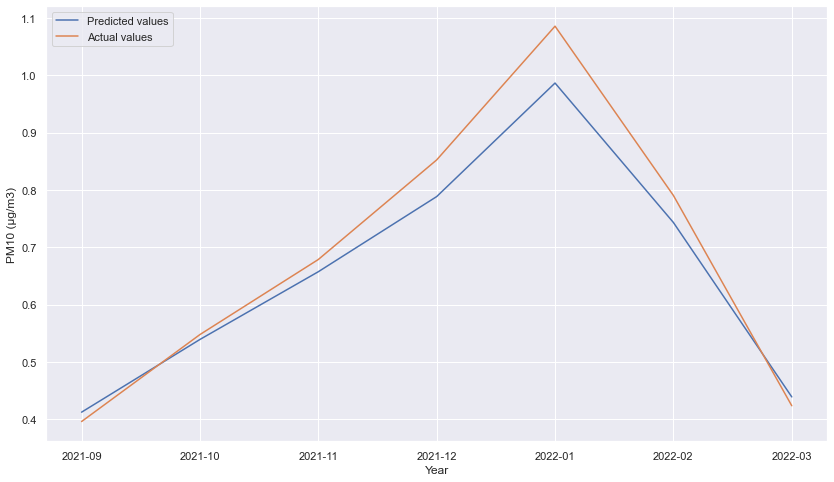

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.222862,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.185805,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.254653,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.265765,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.324704,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.422831,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.430215,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.384988,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [43]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 8)                 520       
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
___________________________________________________

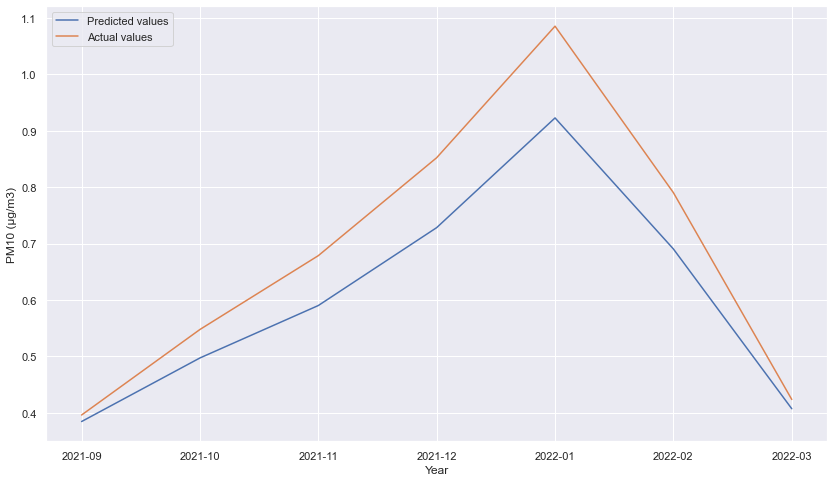

,PM10 predictions,PM10 actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,
2021-09-26 22:45:00,0.168549,0.310335,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:00:00,0.185395,0.265709,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:15:00,0.161384,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.227217,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.323023,0.444215,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.403147,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.388239,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.318450,0.377275,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [44]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)